In [1]:
import snscrape.modules.twitter as stwitter
import pandas as pd
import numpy as np
import pickle as pkl 
from datetime import datetime
import datetime as dt
import string 
import re 
import emoji 


import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer


from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams


from itertools import combinations
from sklearn import decomposition
import gensim 

from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

sns.set_style= ('white')
#plt.style.use("ggplot")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hannahkim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hannahkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pd.set_option('max_colwidth', 800)

In [3]:
df = pd.read_pickle('final_clean.pkl')

df

,datetime,url,content,username,like_count,clean_text,clean_text_lem
0,2020-01-01 00:00:43+00:00,https://twitter.com/helloamygarner/status/1212161696296517632,"I stopped being a meat-loving disaster in the kitchen – and went plant-based in 5 steps, without turning into a crazed evangelical lunatic!\n\nOne of the podcasts that really helps me is the Rich Roll podcast: https://t.co/4OxLD4eYaB\n\n#vegan #richroll https://t.co/ESJxf8I4WM",helloamygarner,0,i stopped being a meat loving disaster in the kitchen – and went plant based in steps without turning into a crazed evangelical lunatic one of the podcasts that really helps me is the rich roll podcast,i stopped being a meat loving disaster in the kitchen – and went plant based in step without turning into a crazed evangelical lunatic one of the podcasts that really help me is the rich roll podcast
1,2020-01-01 00:04:29+00:00,https://twitter.com/Taertebjerg/status/1212162642535763973,Arnold Schwarzenegger has ditched meat and dairy to focus on plant-based eating | Totally Vegan Buzz https://t.co/R8dn9lJMQi,Taertebjerg,0,arnold schwarzenegger has ditched meat and dairy to focus on plant based eating totally vegan buzz,arnold schwarzenegger ha ditched meat and dairy to focus on plant based eating totally vegan buzz
2,2020-01-01 00:31:12+00:00,https://twitter.com/plantpowercoupl/status/1212169364771950593,What?!?!?!?!?!?!?\n\nFYI - this is one of those people who say plant-based dieters also eat meat sometimes b/c that's what they've devolved it to to make themselves feel better.\n\n#plantbased #Vegan,plantpowercoupl,3,what fyi this is one of those people who say plant based dieters also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,what fyi this is one of those people who say plant based dieter also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better
3,2020-01-01 00:31:33+00:00,https://twitter.com/FurForceFive/status/1212169452860522496,Reducing your meat &amp; dairy intake can help mitigate climate change. \nA plant-based diet can also reduce inflammation in the body. It sent my RA into remission when meds stopped working.\n#Vegan #Climate #Health🌱\n\nThe Meat-Lover’s Guide to Eating Less Meat https://t.co/u6xtvNWOPj,FurForceFive,1,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when meds stopped working the meat lover’s guide to eating less meat,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when med stopped working the meat lover’s guide to eating le meat
4,2020-01-01 01:32:27+00:00,https://twitter.com/CatMumof4/status/1212184780659396608,"@KFC_UKI What plant based products will be used? I'm hoping for Jackfruit, if its cooked right it tastes delicious. 😍 \nAs long as it's prepared and cooked in seperate cooking areas and not shared equip with meat products then we will give it a go. Also please introduce vegan mayo sachets",CatMumof4,0,what plant based products will be used i m hoping for jackfruit if its cooked right it tastes delicious as long as it s prepared and cooked in seperate cooking areas and not shared equip with meat products then we will give it a go also please introduce vegan mayo sachets,what plant based product will be used i m hoping for jackfruit if it cooked right it taste delicious a long a it s prepared and cooked in seperate cooking area and not shared equip with meat product then we will give it a go also please introduce vegan mayo sachet
...,...,...,...,...,...,...,...
28868,2022-10-13 20:10:00+00:00,https://twitter.com/LotusHealthInst/status/1580652092263632897,It's all fun and games or is it? #vegetarian #vegan #plantbased \n\nIf The Meat Industry Was Honest - Honest Ads. \nhttps://t.co/ii5uJASTUl,LotusHealthInst,0,it s all fun and games or is it if the me

Set Stopword list 

In [4]:
add_stopwords = ['meat', 'vegan', 'plant', 'based', 'amp', 'don', 'wa', 'ha', 'le', 'lol']
stopwrd = stopwords.words('english')
stopwrd.extend(add_stopwords)

with open('metis_stopwrd.py', 'r') as f:
    lines = [line.strip() for line in f]
stopwrd.extend(lines)

Set the corpus to use for vectorizing 

In [5]:
corpus = df.clean_text_lem 

Topic Modeling 

Selected Model with tuned parameters 

In [6]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [7]:
tfv = TfidfVectorizer(stop_words = stopwrd, min_df = 4)
dc_tfv = tfv.fit_transform(corpus)

nmf = NMF(n_components = 11,init = "nndsvda", random_state = 42)
nmf.fit(dc_tfv)

topic_term_nmf = nmf.components_.round(3)

/Users/hannahkim/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'daren', 'itse', 'mayn', 'mon', 'myse', 'oughtn'] not in stop_words.
  warnings.warn(


In [8]:
topic_term_nmf_df = pd.DataFrame(topic_term_nmf.round(3),
                index = ["component_1", "component_2", "component_3", 
                        "component_4", "component_5", "component_6", 
                        "component_7", "component_8", "component_9", 
                        "component_10", "component_11"],
                columns = tfv.get_feature_names_out())
topic_term_nmf_df

,aa,ab,abandoning,abattoir,abc,abd,ability,abomination,absence,absolute,...,zealous,zesty,zinc,ziti,zombie,zone,zoo,zoom,zoonotic,zucchini
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.002,0.002,...,0.004,0.000,0.018,0.000,0.000,0.016,0.007,0.000,0.001,0.000
component_2,0.000,0.007,0.000,0.001,0.000,0.000,0.005,0.001,0.001,0.002,...,0.000,0.000,0.000,0.000,0.005,0.003,0.001,0.000,0.000,0.002
component_3,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.004,...,0.000,0.001,0.000,0.000,0.004,0.001,0.000,0.000,0.000,0.000
component_4,0.000,0.001,0.001,0.000,0.002,0.001,0.000,0.000,0.000,0.002,...,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000
component_5,0.000,0.005,0.003,0.000,0.000,0.002,0.000,0.001,0.000,0.003,...,0.000,0.000,0.000,0.000,0.000,0.006,0.015,0.000,0.002,0.000
component_6,0.002,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.003,...,0.000,0.005,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.005
component_7,0.000,0.000,0.000,0.002,0.000,0.000,0.001,0.000,0.001,0.002,...,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.005,0.000
component_8,0.000,0.001,0.000,0.000,0.000,0.003,0.005,0.000,0.002,0.000,...,0.000,0.000,0.001,0.000,0.000,0.008,0.000,0.001,0.000,0.000
component_9,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,...,0.002,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000
component_10,0.002,0.000,0.000,0.003,0.000,0.000,0.002,0.003,0.002,0.011,...,0.000,0.000,0.000,0.001,0.000,0.003,0.000,0.000,0.000,0.000


In [9]:
output_nmf = display_topics(nmf, tfv.get_feature_names_out(), 15)
output_nmf


Topic  1
diet, healthy, dairy, health, consumption, evidence, beneficial, debate, cookbook, latest, dog, recipe, study, benefit, fish

Topic  2
eat, meal, lot, fake, veggie, fish, vegetable, time, fruit, choose, real, day, egg, stuff, point

Topic  3
burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget

Topic  4
food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot

Topic  5
animal, product, dairy, egg, industry, planet, cruelty, milk, human, save, veganism, health, honey, grown, suffering

Topic  6
alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great

Topic  7
eating, day, health, year, feel, stopped, time, planet, start, week, body, started, healthy, evidence, meal

Topic  8
vegetarian, eater, option, year, meal, flexitarian, restaurant, lot, dish, product, pescatarian, love, substitute, grill, coo

(NMF(init='nndsvda', n_components=11, random_state=42),
 array(['aa', 'ab', 'abandoning', ..., 'zoom', 'zoonotic', 'zucchini'],
       dtype=object),
 15)

Build dataframe to display dominant topic for each twitter post

In [10]:
def display_topics_2(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [11]:
#display topic with terms into df of highest to lowest weights

In [12]:
topic_keyword= display_topics_2(nmf, tfv.get_feature_names_out(), 15)
topic_keyword_df = pd.DataFrame(topic_keyword)
topic_keyword_df

,Topic 0 words,Topic 1 words,Topic 2 words,Topic 3 words,Topic 4 words,Topic 5 words,Topic 6 words,Topic 7 words,Topic 8 words,Topic 9 words,Topic 10 words
0,diet,eat,burger,food,animal,alternative,eating,vegetarian,taste,people,protein
1,healthy,meal,king,processed,product,free,day,eater,good,lot,source
2,dairy,lot,cooked,fast,dairy,cheese,health,option,real,reason,substitute
3,health,fake,grill,junk,egg,option,year,year,texture,veganism,high
4,consumption,veggie,impossible,fake,industry,dairy,feel,meal,substitute,hate,bean
5,evidence,fish,patty,healthy,planet,meal,stopped,flexitarian,smell,understand,pea
6,beneficial,vegetable,whopper,health,cruelty,recipe,time,restaurant,stuff,choice,body
7,debate,time,veggie,company,milk,chicken,planet,lot,fake,consumption,soy
8,cookbook,fruit,sausage,impossible,human,year,start,dish,reason,industry,fat
9,latest,choose,beef,news,save,delicious,week,product,love,reduce,vegetable


In [13]:
topic_title = ["Healthy Diet ", "Fake Food", "Brand Deal", 
               "Processed Food ", "Products", "Alternative Option", 
               "Healthy Eating", "Diet Options", "Taste", 
               "People’s Choice", "Protein Source"]
topic_keyword_df.columns  = topic_title
topic_keyword_df

,Healthy Diet,Fake Food,Brand Deal,Processed Food,Products,Alternative Option,Healthy Eating,Diet Options,Taste,People’s Choice,Protein Source
0,diet,eat,burger,food,animal,alternative,eating,vegetarian,taste,people,protein
1,healthy,meal,king,processed,product,free,day,eater,good,lot,source
2,dairy,lot,cooked,fast,dairy,cheese,health,option,real,reason,substitute
3,health,fake,grill,junk,egg,option,year,year,texture,veganism,high
4,consumption,veggie,impossible,fake,industry,dairy,feel,meal,substitute,hate,bean
5,evidence,fish,patty,healthy,planet,meal,stopped,flexitarian,smell,understand,pea
6,beneficial,vegetable,whopper,health,cruelty,recipe,time,restaurant,stuff,choice,body
7,debate,time,veggie,company,milk,chicken,planet,lot,fake,consumption,soy
8,cookbook,fruit,sausage,impossible,human,year,start,dish,reason,industry,fat
9,latest,choose,beef,news,save,delicious,week,product,love,reduce,vegetable


In [14]:
#df to display dominant topics for each post 

In [15]:
nmf_mod = nmf.transform(dc_tfv)

# column names
topic_titles = topic_keyword_df.columns

# index names
doc_number = ["Document " + str(i) for i in range(len(df))]

df_document_topic = pd.DataFrame(np.round(nmf_mod, 3), columns=topic_titles, index=doc_number)

In [16]:
df_document_topic['dominant_topic'] = np.argmax(df_document_topic.values, axis=1)

df_document_topic

,Healthy Diet,Fake Food,Brand Deal,Processed Food,Products,Alternative Option,Healthy Eating,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic
Document 0,0.000,0.000,0.001,0.001,0.000,0.006,0.005,0.000,0.000,0.001,0.003,5
Document 1,0.003,0.000,0.000,0.001,0.005,0.008,0.045,0.000,0.000,0.000,0.000,6
Document 2,0.000,0.065,0.000,0.000,0.000,0.000,0.003,0.000,0.001,0.081,0.000,9
Document 3,0.023,0.000,0.000,0.000,0.006,0.008,0.043,0.000,0.000,0.004,0.003,6
Document 4,0.000,0.000,0.017,0.000,0.043,0.006,0.000,0.004,0.040,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
Document 28868,0.000,0.000,0.002,0.003,0.004,0.004,0.000,0.000,0.000,0.003,0.001,4
Document 28869,0.000,0.000,0.039,0.000,0.032,0.015,0.000,0.016,0.002,0.003,0.000,2
Document 28870,0.000,0.000,0.000,0.000,0.000,0.041,0.000,0.000,0.000,0.003,0.002,5
Document 28871,0.000,0.000,0.001,0.001,0.000,0.039,0.000,0.016,0.000,0.000,0.000,5


In [17]:
#get topics and its corresponding terms

In [18]:
df_pivot_topic = topic_keyword_df.T


In [19]:
topic_series=pd.Series(df_pivot_topic.values.tolist()) 
topic_series

0         [diet, healthy, dairy, health, consumption, evidence, beneficial, debate, cookbook, latest, dog, recipe, study, benefit, fish]
1                                     [eat, meal, lot, fake, veggie, fish, vegetable, time, fruit, choose, real, day, egg, stuff, point]
2            [burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]
3                   [food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]
4                 [animal, product, dairy, egg, industry, planet, cruelty, milk, human, save, veganism, health, honey, grown, suffering]
5                       [alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]
6                          [eating, day, health, year, feel, stopped, time, planet, start, week, body, started, healthy, evidence, meal]
7     [vegetarian, eater, option, year, m

In [20]:
#set to dataframe
df_topics_terms = topic_series.to_frame().reset_index()
df_topics_terms

,index,0
0,0,"[diet, healthy, dairy, health, consumption, evidence, beneficial, debate, cookbook, latest, dog, recipe, study, benefit, fish]"
1,1,"[eat, meal, lot, fake, veggie, fish, vegetable, time, fruit, choose, real, day, egg, stuff, point]"
2,2,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]"
3,3,"[food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]"
4,4,"[animal, product, dairy, egg, industry, planet, cruelty, milk, human, save, veganism, health, honey, grown, suffering]"
5,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
6,6,"[eating, day, health, year, feel, stopped, time, planet, start, week, body, started, healthy, evidence, meal]"
7,7,"[vegetarian, eater, option, year, meal, flexitarian, restaurant, lot, dish, product, pescatarian, love, substitute, grill, cooked]"
8,8,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]"
9,9,"[people, lot, reason, veganism, hate, understand, choice, consumption, industry, reduce, change, turn, live, lifestyle, eater]"


In [21]:
df_topics_terms.index= ["Healthy Diet ", "Fake Food", "Brand Deal", 
               "Processed Food ", "Products", "Alternative Option", 
               "Healthy Eating", "Diet Options", "Taste", 
               "People’s Choice", "Protein Source"]
df_topics_terms.rename(columns = {0:'topic_term', 'level_0':'topic_title'}, inplace = True)
df_topics_terms.reset_index(inplace = True)


In [22]:
df_topics_terms

,level_0,index,topic_term
0,Healthy Diet,0,"[diet, healthy, dairy, health, consumption, evidence, beneficial, debate, cookbook, latest, dog, recipe, study, benefit, fish]"
1,Fake Food,1,"[eat, meal, lot, fake, veggie, fish, vegetable, time, fruit, choose, real, day, egg, stuff, point]"
2,Brand Deal,2,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]"
3,Processed Food,3,"[food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]"
4,Products,4,"[animal, product, dairy, egg, industry, planet, cruelty, milk, human, save, veganism, health, honey, grown, suffering]"
5,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
6,Healthy Eating,6,"[eating, day, health, year, feel, stopped, time, planet, start, week, body, started, healthy, evidence, meal]"
7,Diet Options,7,"[vegetarian, eater, option, year, meal, flexitarian, restaurant, lot, dish, product, pescatarian, love, substitute, grill, cooked]"
8,Taste,8,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]"
9,People’s Choice,9,"[people, lot, reason, veganism, hate, understand, choice, consumption, industry, reduce, change, turn, live, lifestyle, eater]"


In [23]:
df_topics_terms.rename(columns = {'level_0':'topic_title'}, inplace = True)


In [24]:
df_topics_terms

,topic_title,index,topic_term
0,Healthy Diet,0,"[diet, healthy, dairy, health, consumption, evidence, beneficial, debate, cookbook, latest, dog, recipe, study, benefit, fish]"
1,Fake Food,1,"[eat, meal, lot, fake, veggie, fish, vegetable, time, fruit, choose, real, day, egg, stuff, point]"
2,Brand Deal,2,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]"
3,Processed Food,3,"[food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]"
4,Products,4,"[animal, product, dairy, egg, industry, planet, cruelty, milk, human, save, veganism, health, honey, grown, suffering]"
5,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
6,Healthy Eating,6,"[eating, day, health, year, feel, stopped, time, planet, start, week, body, started, healthy, evidence, meal]"
7,Diet Options,7,"[vegetarian, eater, option, year, meal, flexitarian, restaurant, lot, dish, product, pescatarian, love, substitute, grill, cooked]"
8,Taste,8,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]"
9,People’s Choice,9,"[people, lot, reason, veganism, hate, understand, choice, consumption, industry, reduce, change, turn, live, lifestyle, eater]"


In [25]:
#function to translate topic number to corresponding title 
def label_topics(topic_number):
    if topic_number == 0: 
        topic_number = "Healthy Diet"
    elif topic_number == 1:
        topic_number = "Fake Food"
    elif topic_number == 2:
        topic_number = "Brand Deal"
    elif topic_number == 3:
        topic_number = "Processed Food"
    elif topic_number == 4:
        topic_number = "Products"
    elif topic_number == 5:
        topic_number = "Alternative Option"
    elif topic_number == 6:
        topic_number = "Healthy Eating"
    elif topic_number == 7:
        topic_number = "Diet Options"
    elif topic_number == 8:
        topic_number = "Taste"
    elif topic_number == 9:
        topic_number = "People's Choice"
    elif topic_number == 10:
        topic_number = "Protein Source"
    return topic_number 



In [26]:
df_document_topic['topic_title'] = df_document_topic.dominant_topic.apply(label_topics)
df_document_topic

,Healthy Diet,Fake Food,Brand Deal,Processed Food,Products,Alternative Option,Healthy Eating,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title
Document 0,0.000,0.000,0.001,0.001,0.000,0.006,0.005,0.000,0.000,0.001,0.003,5,Alternative Option
Document 1,0.003,0.000,0.000,0.001,0.005,0.008,0.045,0.000,0.000,0.000,0.000,6,Healthy Eating
Document 2,0.000,0.065,0.000,0.000,0.000,0.000,0.003,0.000,0.001,0.081,0.000,9,People's Choice
Document 3,0.023,0.000,0.000,0.000,0.006,0.008,0.043,0.000,0.000,0.004,0.003,6,Healthy Eating
Document 4,0.000,0.000,0.017,0.000,0.043,0.006,0.000,0.004,0.040,0.000,0.000,4,Products
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Document 28868,0.000,0.000,0.002,0.003,0.004,0.004,0.000,0.000,0.000,0.003,0.001,4,Products
Document 28869,0.000,0.000,0.039,0.000,0.032,0.015,0.000,0.016,0.002,0.003,0.000,2,Brand Deal
Document 28870,0.000,0.000,0.000,0.000,0.000,0.041,0.000,0.000,0.000,0.003,0.002,5,Alternative Option
Document 28871,0.000,0.000,0.001,0.001,0.000,0.039,0.000,0.016,0.000,0.000,0.000,5,Alternative Option


In [27]:
df1 = pd.merge(df_document_topic,df_topics_terms, left_on = 'dominant_topic', right_on = 'index')
df1

,Healthy Diet,Fake Food,Brand Deal,Processed Food,Products,Alternative Option,Healthy Eating,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title_x,topic_title_y,index,topic_term
0,0.000,0.000,0.001,0.001,0.000,0.006,0.005,0.000,0.000,0.001,0.003,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
1,0.007,0.003,0.000,0.000,0.021,0.037,0.003,0.000,0.000,0.000,0.000,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
2,0.020,0.002,0.000,0.041,0.000,0.046,0.000,0.000,0.000,0.000,0.000,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
3,0.002,0.001,0.000,0.000,0.000,0.027,0.011,0.007,0.000,0.000,0.000,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
4,0.001,0.003,0.000,0.000,0.020,0.041,0.006,0.006,0.000,0.003,0.000,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28868,0.000,0.001,0.000,0.050,0.001,0.003,0.000,0.002,0.003,0.003,0.001,3,Processed Food,Processed Food,3,"[food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]"
28869,0.000,0.000,0.001,0.039,0.000,0.007,0.000,0.001,0.001,0.001,0.000,3,Processed Food,Processed Food,3,"[food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]"
28870,0.004,0.000,0.001,0.030,0.001,0.005,0.000,0.000,0.000,0.000,0.001,3,Processed Food,Processed Food,3,"[food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]"
28871,0.000,0.000,0.001,0.033,0.002,0.008,0.001,0.000,0.000,0.001,0.000,3,Processed Food,Processed Food,3,"[food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]"


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28873 entries, 0 to 28872
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Healthy Diet        28873 non-null  float64
 1   Fake Food           28873 non-null  float64
 2   Brand Deal          28873 non-null  float64
 3   Processed Food      28873 non-null  float64
 4   Products            28873 non-null  float64
 5   Alternative Option  28873 non-null  float64
 6   Healthy Eating      28873 non-null  float64
 7   Diet Options        28873 non-null  float64
 8   Taste               28873 non-null  float64
 9   People’s Choice     28873 non-null  float64
 10  Protein Source      28873 non-null  float64
 11  dominant_topic      28873 non-null  int64  
 12  topic_title_x       28873 non-null  object 
 13  topic_title_y       28873 non-null  object 
 14  index               28873 non-null  int64  
 15  topic_term          28873 non-null  object 
dtypes: f

In [29]:
#df1 = df1[['dominant_topic', 'topic_title_x', 'topic_term']]
#df1

In [30]:
#create df for all documents w/ dominant topic number, title, terms 
df_final = pd.merge(df,df1, left_index = True, right_index = True)
df_final

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Healthy Eating,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title_x,topic_title_y,index,topic_term
0,2020-01-01 00:00:43+00:00,https://twitter.com/helloamygarner/status/1212161696296517632,"I stopped being a meat-loving disaster in the kitchen – and went plant-based in 5 steps, without turning into a crazed evangelical lunatic!\n\nOne of the podcasts that really helps me is the Rich Roll podcast: https://t.co/4OxLD4eYaB\n\n#vegan #richroll https://t.co/ESJxf8I4WM",helloamygarner,0,i stopped being a meat loving disaster in the kitchen – and went plant based in steps without turning into a crazed evangelical lunatic one of the podcasts that really helps me is the rich roll podcast,i stopped being a meat loving disaster in the kitchen – and went plant based in step without turning into a crazed evangelical lunatic one of the podcasts that really help me is the rich roll podcast,0.000,0.000,0.001,...,0.005,0.000,0.000,0.001,0.003,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
1,2020-01-01 00:04:29+00:00,https://twitter.com/Taertebjerg/status/1212162642535763973,Arnold Schwarzenegger has ditched meat and dairy to focus on plant-based eating | Totally Vegan Buzz https://t.co/R8dn9lJMQi,Taertebjerg,0,arnold schwarzenegger has ditched meat and dairy to focus on plant based eating totally vegan buzz,arnold schwarzenegger ha ditched meat and dairy to focus on plant based eating totally vegan buzz,0.007,0.003,0.000,...,0.003,0.000,0.000,0.000,0.000,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
2,2020-01-01 00:31:12+00:00,https://twitter.com/plantpowercoupl/status/1212169364771950593,What?!?!?!?!?!?!?\n\nFYI - this is one of those people who say plant-based dieters also eat meat sometimes b/c that's what they've devolved it to to make themselves feel better.\n\n#plantbased #Vegan,plantpowercoupl,3,what fyi this is one of those people who say plant based dieters also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,what fyi this is one of those people who say plant based dieter also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,0.020,0.002,0.000,...,0.000,0.000,0.000,0.000,0.000,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
3,2020-01-01 00:31:33+00:00,https://twitter.com/FurForceFive/status/1212169452860522496,Reducing your meat &amp; dairy intake can help mitigate climate change. \nA plant-based diet can also reduce inflammation in the body. It sent my RA into remission when meds stopped working.\n#Vegan #Climate #Health🌱\n\nThe Meat-Lover’s Guide to Eating Less Meat https://t.co/u6xtvNWOPj,FurForceFive,1,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when meds stopped working the meat lover’s guide to eating less meat,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when med stopped working the meat lover’s guide to eating le meat,0.002,0.001,0.000,...,0.011,0.007,0.000,0.000,0.000,5,Alternative Option,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
4,2020-01-01 01:32:27+00:00,https://twitter.com/CatMumof4/status/1212184780659396608,"@KFC_UKI What plant based products will be used? I'm hoping for Jackfruit, if its cooked right it tastes delicious. 😍 \nAs long as it's prepared and cooked in seperate 

In [31]:
df_final.rename(columns = {'topic_title_x': 'topic_title'}, inplace = True)

In [32]:
df_final.drop(columns = ['topic_title_y', 'index'], inplace = True)
df_final.head()

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Products,Alternative Option,Healthy Eating,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term
0,2020-01-01 00:00:43+00:00,https://twitter.com/helloamygarner/status/1212161696296517632,"I stopped being a meat-loving disaster in the kitchen – and went plant-based in 5 steps, without turning into a crazed evangelical lunatic!\n\nOne of the podcasts that really helps me is the Rich Roll podcast: https://t.co/4OxLD4eYaB\n\n#vegan #richroll https://t.co/ESJxf8I4WM",helloamygarner,0,i stopped being a meat loving disaster in the kitchen – and went plant based in steps without turning into a crazed evangelical lunatic one of the podcasts that really helps me is the rich roll podcast,i stopped being a meat loving disaster in the kitchen – and went plant based in step without turning into a crazed evangelical lunatic one of the podcasts that really help me is the rich roll podcast,0.000,0.000,0.001,...,0.000,0.006,0.005,0.000,0.0,0.001,0.003,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
1,2020-01-01 00:04:29+00:00,https://twitter.com/Taertebjerg/status/1212162642535763973,Arnold Schwarzenegger has ditched meat and dairy to focus on plant-based eating | Totally Vegan Buzz https://t.co/R8dn9lJMQi,Taertebjerg,0,arnold schwarzenegger has ditched meat and dairy to focus on plant based eating totally vegan buzz,arnold schwarzenegger ha ditched meat and dairy to focus on plant based eating totally vegan buzz,0.007,0.003,0.000,...,0.021,0.037,0.003,0.000,0.0,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
2,2020-01-01 00:31:12+00:00,https://twitter.com/plantpowercoupl/status/1212169364771950593,What?!?!?!?!?!?!?\n\nFYI - this is one of those people who say plant-based dieters also eat meat sometimes b/c that's what they've devolved it to to make themselves feel better.\n\n#plantbased #Vegan,plantpowercoupl,3,what fyi this is one of those people who say plant based dieters also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,what fyi this is one of those people who say plant based dieter also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,0.020,0.002,0.000,...,0.000,0.046,0.000,0.000,0.0,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
3,2020-01-01 00:31:33+00:00,https://twitter.com/FurForceFive/status/1212169452860522496,Reducing your meat &amp; dairy intake can help mitigate climate change. \nA plant-based diet can also reduce inflammation in the body. It sent my RA into remission when meds stopped working.\n#Vegan #Climate #Health🌱\n\nThe Meat-Lover’s Guide to Eating Less Meat https://t.co/u6xtvNWOPj,FurForceFive,1,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when meds stopped working the meat lover’s guide to eating less meat,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when med stopped working the meat lover’s guide to eating le meat,0.002,0.001,0.000,...,0.000,0.027,0.011,0.007,0.0,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
4,2020-01-01 01:32:27+00:00,https://twitter.com/CatMumof4/status/1212184780659396608,"@KFC_UKI What plant based products will be used? I'm hoping for Jackfruit, if its cooked right it tastes delicious. 😍 \nAs long as it's prepared and cooked in seperate cooking areas and not shared equip wit

In [33]:
#define each post as Year-Month 
df_final['ym_date'] = df_final['datetime'].dt.strftime('%Y-%m')

df_final

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Alternative Option,Healthy Eating,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date
0,2020-01-01 00:00:43+00:00,https://twitter.com/helloamygarner/status/1212161696296517632,"I stopped being a meat-loving disaster in the kitchen – and went plant-based in 5 steps, without turning into a crazed evangelical lunatic!\n\nOne of the podcasts that really helps me is the Rich Roll podcast: https://t.co/4OxLD4eYaB\n\n#vegan #richroll https://t.co/ESJxf8I4WM",helloamygarner,0,i stopped being a meat loving disaster in the kitchen – and went plant based in steps without turning into a crazed evangelical lunatic one of the podcasts that really helps me is the rich roll podcast,i stopped being a meat loving disaster in the kitchen – and went plant based in step without turning into a crazed evangelical lunatic one of the podcasts that really help me is the rich roll podcast,0.000,0.000,0.001,...,0.006,0.005,0.000,0.000,0.001,0.003,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01
1,2020-01-01 00:04:29+00:00,https://twitter.com/Taertebjerg/status/1212162642535763973,Arnold Schwarzenegger has ditched meat and dairy to focus on plant-based eating | Totally Vegan Buzz https://t.co/R8dn9lJMQi,Taertebjerg,0,arnold schwarzenegger has ditched meat and dairy to focus on plant based eating totally vegan buzz,arnold schwarzenegger ha ditched meat and dairy to focus on plant based eating totally vegan buzz,0.007,0.003,0.000,...,0.037,0.003,0.000,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01
2,2020-01-01 00:31:12+00:00,https://twitter.com/plantpowercoupl/status/1212169364771950593,What?!?!?!?!?!?!?\n\nFYI - this is one of those people who say plant-based dieters also eat meat sometimes b/c that's what they've devolved it to to make themselves feel better.\n\n#plantbased #Vegan,plantpowercoupl,3,what fyi this is one of those people who say plant based dieters also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,what fyi this is one of those people who say plant based dieter also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,0.020,0.002,0.000,...,0.046,0.000,0.000,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01
3,2020-01-01 00:31:33+00:00,https://twitter.com/FurForceFive/status/1212169452860522496,Reducing your meat &amp; dairy intake can help mitigate climate change. \nA plant-based diet can also reduce inflammation in the body. It sent my RA into remission when meds stopped working.\n#Vegan #Climate #Health🌱\n\nThe Meat-Lover’s Guide to Eating Less Meat https://t.co/u6xtvNWOPj,FurForceFive,1,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when meds stopped working the meat lover’s guide to eating less meat,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when med stopped working the meat lover’s guide to eating le meat,0.002,0.001,0.000,...,0.027,0.011,0.007,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01
4,2020-01-01 01:32:27+00:00,https://twitter.com/CatMumof4/status/1212184780659396608,"@KFC_UKI What plant based products will be used? I'm hoping for Jackfruit, if its cooked right it tastes delicious. 😍 \nAs long as it's prepared and cooked in seperate cooking areas and not s

Save to pickle file

In [34]:
df_final.to_pickle('topic_modling.pkl')

Topic Overtime

In [35]:
#define highest count of topic across each month-year 

df_overtime = df_final.groupby(['ym_date', 'topic_title']).size().reset_index()

df_overtime

,ym_date,topic_title,0
0,2020-01,Alternative Option,1907
1,2020-02,Alternative Option,1061
2,2020-03,Alternative Option,776
3,2020-04,Alternative Option,737
4,2020-05,Alternative Option,889
5,2020-06,Alternative Option,791
6,2020-07,Alternative Option,703
7,2020-07,Healthy Eating,242
8,2020-08,Healthy Eating,943
9,2020-09,Healthy Eating,798


In [36]:
df_overtime.rename(columns = {0:'topic_counts'}, inplace = True)

In [37]:
#keep max counts 
(df_overtime.sort_values(['ym_date','topic_counts'], ascending = True, inplace = True)
   )
df_overtime.drop_duplicates(['ym_date'], keep='last', inplace = True)
df_overtime

,ym_date,topic_title,topic_counts
0,2020-01,Alternative Option,1907
1,2020-02,Alternative Option,1061
2,2020-03,Alternative Option,776
3,2020-04,Alternative Option,737
4,2020-05,Alternative Option,889
5,2020-06,Alternative Option,791
6,2020-07,Alternative Option,703
8,2020-08,Healthy Eating,943
9,2020-09,Healthy Eating,798
11,2020-10,People's Choice,686


In [53]:
df_overtime.ym_date = pd.to_datetime(df_overtime.ym_date).dt.strftime('%m/%Y')
df_overtime

,ym_date,topic_title,topic_counts
0,01/2020,Alternative Option,1907
1,02/2020,Alternative Option,1061
2,03/2020,Alternative Option,776
3,04/2020,Alternative Option,737
4,05/2020,Alternative Option,889
5,06/2020,Alternative Option,791
6,07/2020,Alternative Option,703
8,08/2020,Healthy Eating,943
9,09/2020,Healthy Eating,798
11,10/2020,People's Choice,686


In [54]:
#save to pickle file 

df_overtime.to_pickle('topic_overtime.pkl')

Dominant Topic Overtime (All years)

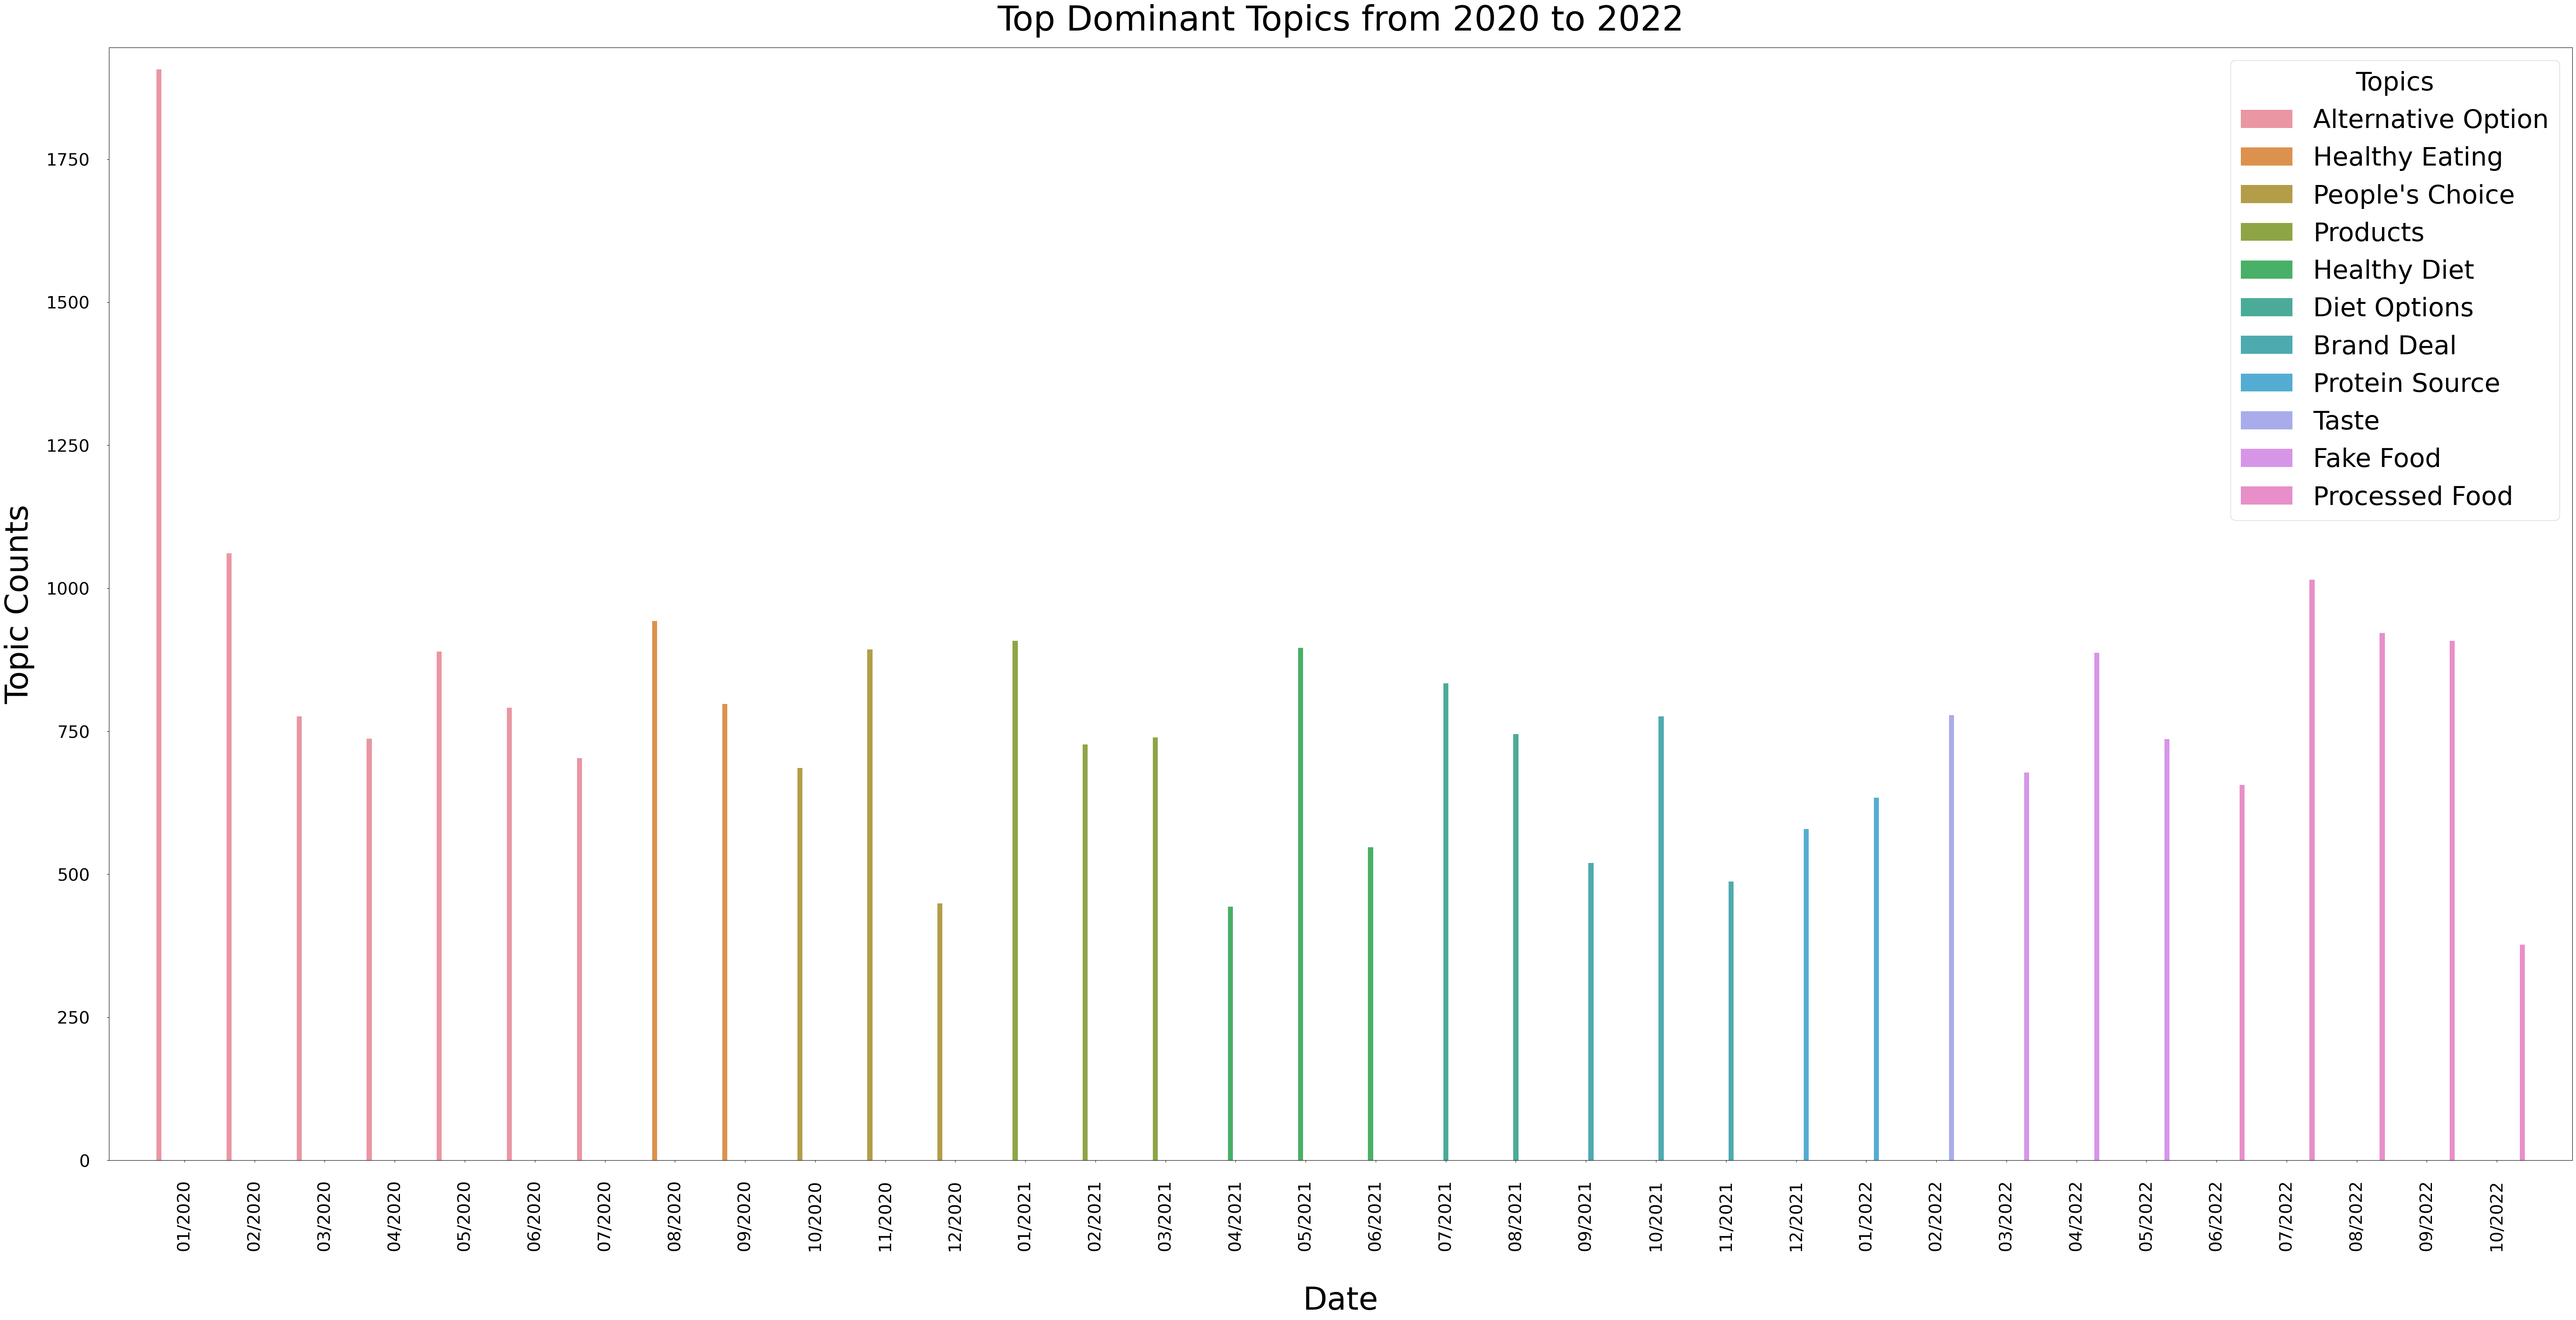

In [98]:
fig,ax = plt.subplots(figsize = (77,35))


sns.barplot(x = 'ym_date', y = 'topic_counts', hue = 'topic_title', data = df_overtime)

ax.set_xlabel('Date', fontsize=55, labelpad = 60)
ax.set_ylabel('Topic Counts', fontsize=55, labelpad = 20)
rcParams['axes.titlepad'] = 5 
ax.tick_params(axis='both', which='major', labelsize=30, pad = 30)


plt.title("Top Dominant Topics from 2020 to 2022", fontsize=60, pad = 30)


plt.xticks(rotation= 'vertical')
plt.margins(0.02)

ax.legend(fontsize=14, title='Topics',title_fontsize=45, loc = 'upper right', prop={'size':45})

#legend = plt.legend(fontsize='large', fancybox=True)
#legend.set_title("Topics", prop={'size':14})   

# extract the legend labels
#handles, legend_labels = ax.get_legend_handles_labels()

# iterate through the zipped containers and legend_labels
#for c, l in zip(ax.containers, legend_labels):

    # customize the labels: only plot values greater than 0 and append the legend label
    #labels = [f'{l}' if (w := v.get_height()) > 0 else '' for v in c]
    
    # add the bar annotation
    #ax.bar_label(c, labels=labels, label_type='edge',padding = 2, fontsize = 17, fontweight = 'bold')
plt.savefig('top_topics_time.png')

Topic Overtime in 2020

In [40]:
df_final_2020 = df_overtime[(df_overtime.ym_date >= '2020-01') 
                          & (df_overtime.ym_date <= '2020-12')]

df_final_2020

,ym_date,topic_title,topic_counts
0,2020-01,Alternative Option,1907
1,2020-02,Alternative Option,1061
2,2020-03,Alternative Option,776
3,2020-04,Alternative Option,737
4,2020-05,Alternative Option,889
5,2020-06,Alternative Option,791
6,2020-07,Alternative Option,703
8,2020-08,Healthy Eating,943
9,2020-09,Healthy Eating,798
11,2020-10,People's Choice,686


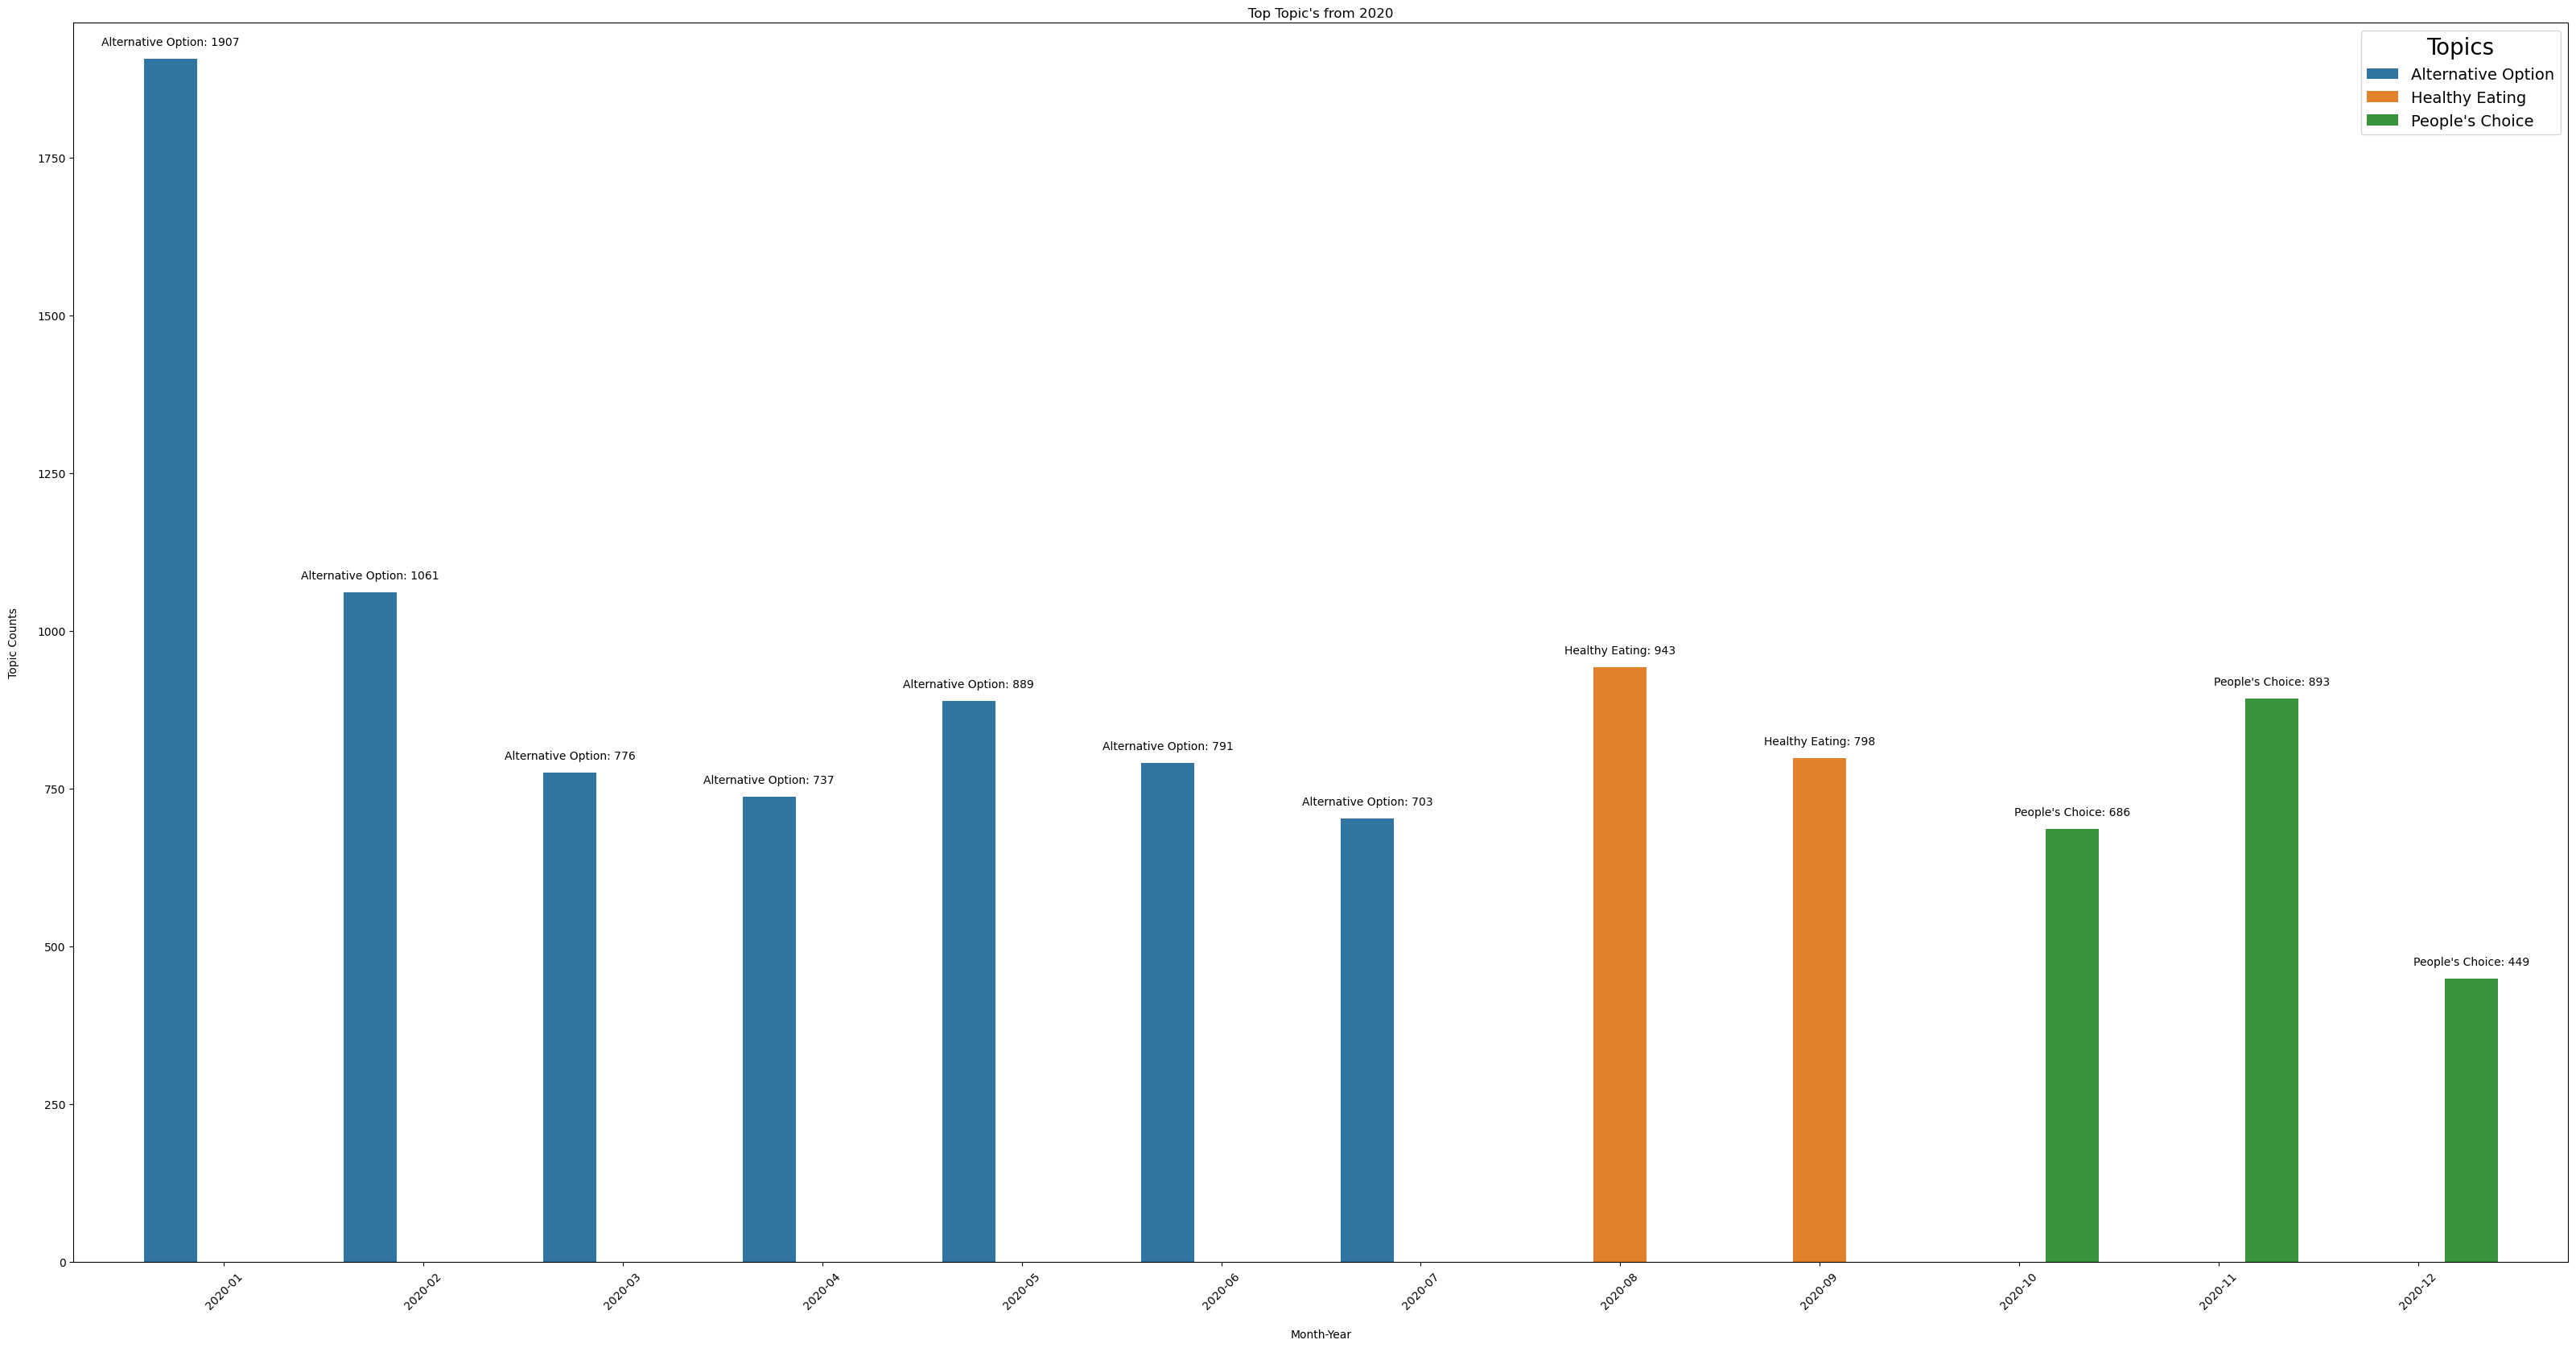

In [41]:
import seaborn as sns

sns.set_style= ('white')
fig,ax = plt.subplots(figsize = (40,20))
#plt.figure(figsize = (20,10))


sns.barplot(x = 'ym_date', y = 'topic_counts', hue = 'topic_title', data = df_final_2020)

ax.set_xlabel('Month-Year', fontsize=10, labelpad = 16)
ax.set_ylabel('Topic Counts', fontsize=10, labelpad = 16)
plt.title("Top Topic's from 2020")
rcParams['axes.titlepad'] = 5 



plt.xticks(rotation= 45)
plt.margins(0.03)

ax.legend(fontsize=14, title='Topics',title_fontsize=20, loc = 'upper right')

#legend = plt.legend(fontsize='small', fancybox=True)

#legend.set_title("Topic Title")   

# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()

# iterate through the zipped containers and legend_labels
for c, l in zip(ax.containers, legend_labels):

    # customize the labels: only plot values greater than 0 and append the legend label
    labels = [f'{l}: {w:.0f}' if (w := v.get_height()) > 0 else '' for v in c]
    
    # add the bar annotation
    ax.bar_label(c, labels=labels, label_type='edge', padding = 10)

Topic Overtime in 2021

In [42]:
df_final_2021 = df_overtime[(df_overtime.ym_date >= '2021-01') 
                          & (df_overtime.ym_date <= '2021-12')]
df_final_2021

,ym_date,topic_title,topic_counts
15,2021-01,Products,908
16,2021-02,Products,727
17,2021-03,Products,739
18,2021-04,Healthy Diet,443
20,2021-05,Healthy Diet,896
22,2021-06,Healthy Diet,547
23,2021-07,Diet Options,834
24,2021-08,Diet Options,745
25,2021-09,Brand Deal,520
27,2021-10,Brand Deal,776


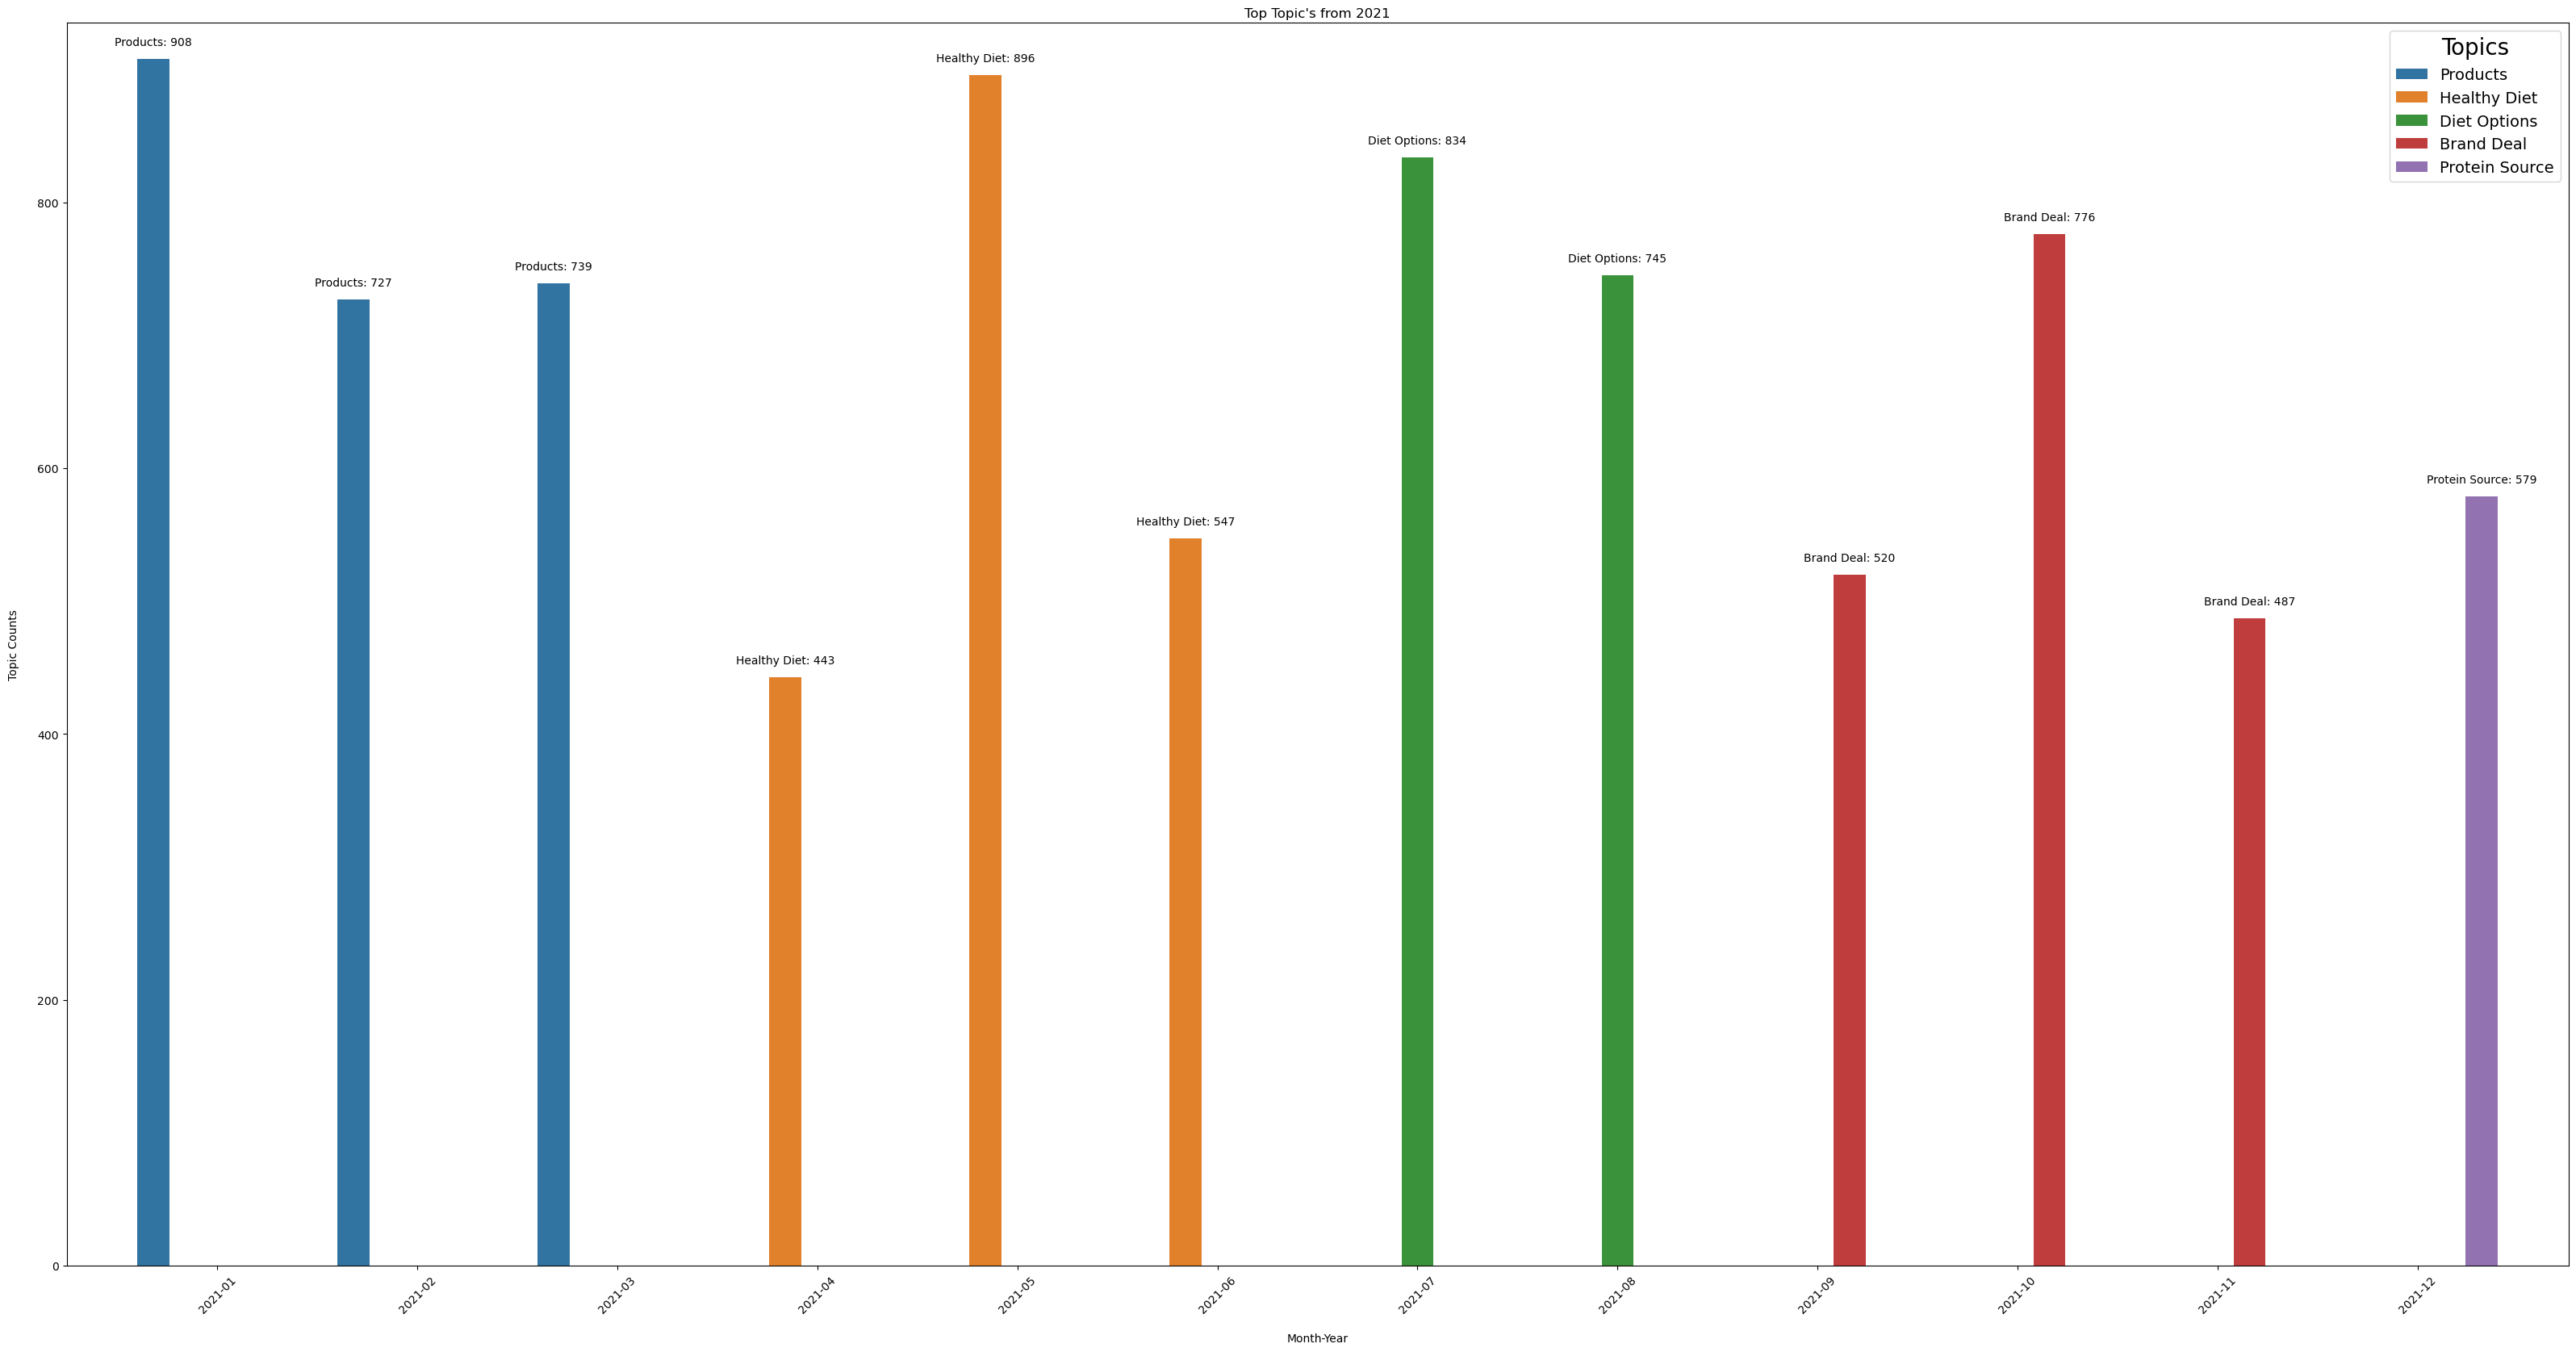

In [43]:
sns.set_style= ('white')
fig,ax = plt.subplots(figsize = (40,20))
#plt.figure(figsize = (20,10))


sns.barplot(x = 'ym_date', y = 'topic_counts', hue = 'topic_title', data = df_final_2021)

ax.set_xlabel('Month-Year', fontsize=10, labelpad = 16)
ax.set_ylabel('Topic Counts', fontsize=10, labelpad = 16)
plt.title("Top Topic's from 2021")
rcParams['axes.titlepad'] = 5 


plt.xticks(rotation= 45)
plt.margins(0.03)

ax.legend(fontsize=14, title='Topics',title_fontsize=20, loc = 'upper right')

#legend = plt.legend(fontsize='small', fancybox=True)

#legend.set_title("Topic Title")   

# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()

# iterate through the zipped containers and legend_labels
for c, l in zip(ax.containers, legend_labels):

    # customize the labels: only plot values greater than 0 and append the legend label
    labels = [f'{l}: {w:.0f}' if (w := v.get_height()) > 0 else '' for v in c]
    
    # add the bar annotation
    ax.bar_label(c, labels=labels, label_type='edge', padding = 10)

Topic Overtime in 2022

In [44]:
df_final_2022 = df_overtime[(df_overtime.ym_date >= '2022-01') 
                          & (df_overtime.ym_date <= '2022-10')]
df_final_2022

,ym_date,topic_title,topic_counts
31,2022-01,Protein Source,634
33,2022-02,Taste,778
34,2022-03,Fake Food,678
36,2022-04,Fake Food,887
37,2022-05,Fake Food,736
39,2022-06,Processed Food,656
40,2022-07,Processed Food,1015
41,2022-08,Processed Food,922
42,2022-09,Processed Food,908
43,2022-10,Processed Food,377


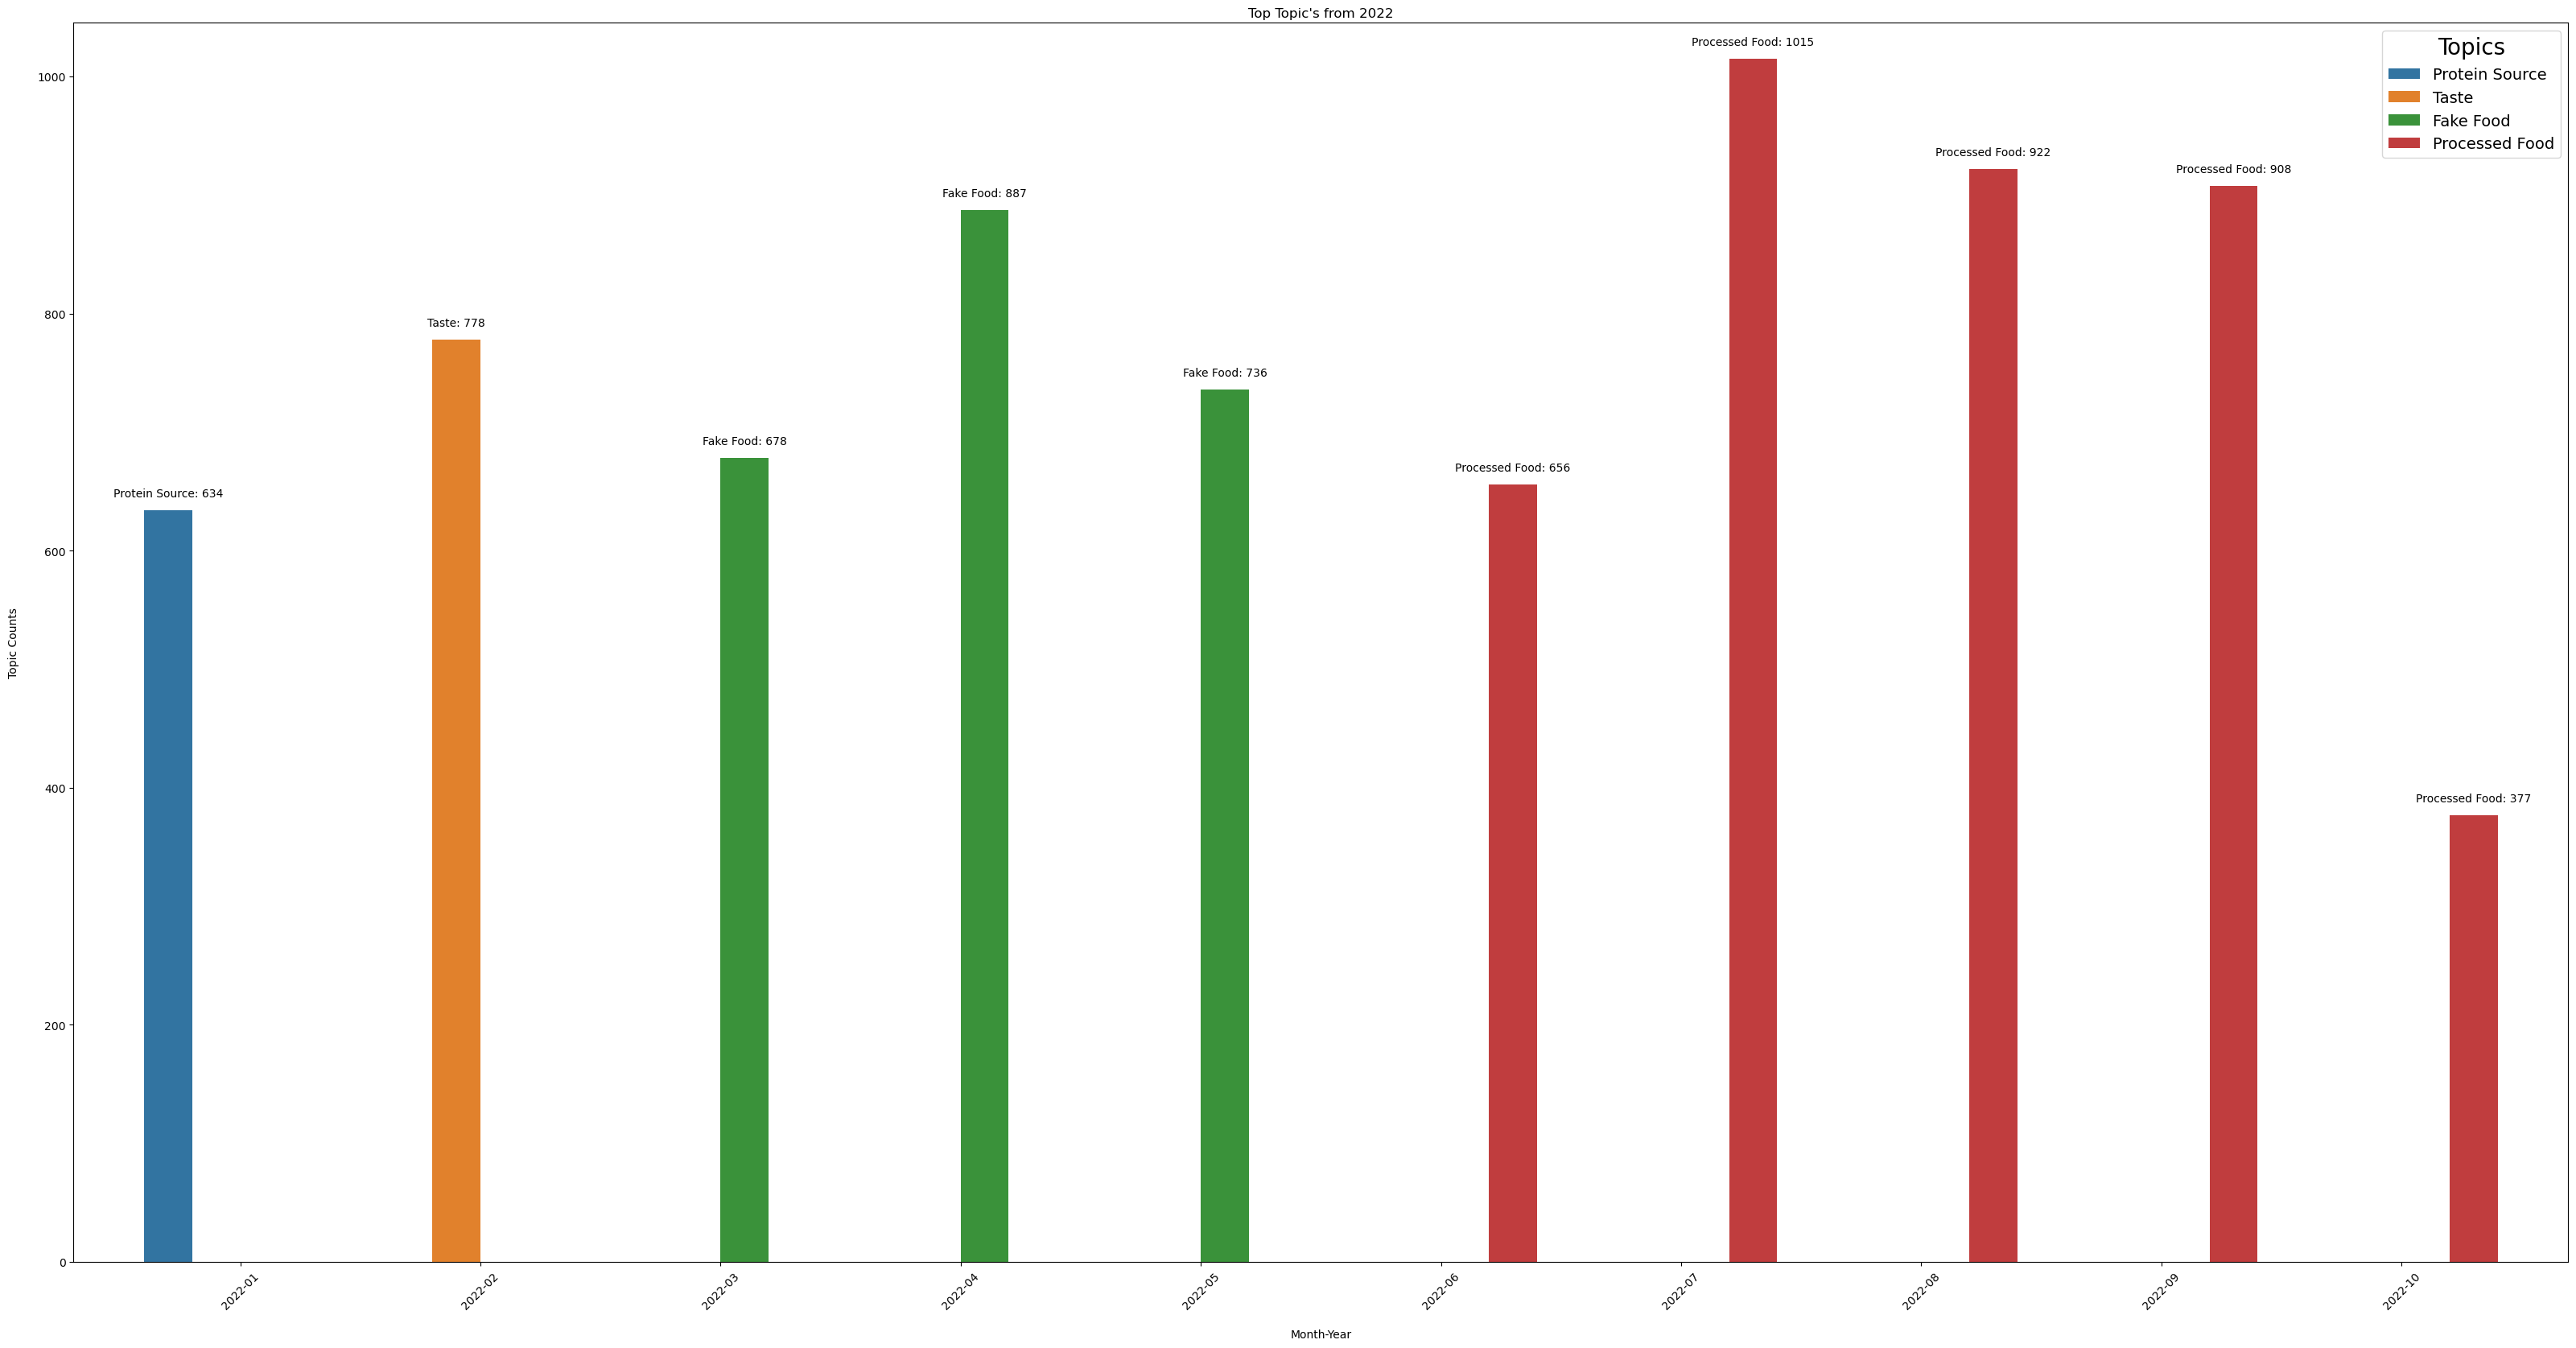

In [45]:
sns.set_style= ('white')
fig,ax = plt.subplots(figsize = (40,20))
#plt.figure(figsize = (20,10))


sns.barplot(x = 'ym_date', y = 'topic_counts', hue = 'topic_title', data = df_final_2022)

ax.set_xlabel('Month-Year', fontsize=10, labelpad = 16)
ax.set_ylabel('Topic Counts', fontsize=10, labelpad = 16)
plt.title("Top Topic's from 2022")
rcParams['axes.titlepad'] = 5 



plt.xticks(rotation= 45)
plt.margins(0.03)

ax.legend(fontsize=14, title='Topics',title_fontsize=20, loc = 'upper right')

#legend = plt.legend(fontsize='small', fancybox=True)

#legend.set_title("Topic Title")   

# extract the legend labels
handles, legend_labels = ax.get_legend_handles_labels()

# iterate through the zipped containers and legend_labels
for c, l in zip(ax.containers, legend_labels):

    # customize the labels: only plot values greater than 0 and append the legend label
    labels = [f'{l}: {w:.0f}' if (w := v.get_height()) > 0 else '' for v in c]
    
    # add the bar annotation
    ax.bar_label(c, labels=labels, label_type='edge', padding = 10)

WordCloud Across all Topics 

In [46]:
df_topics_terms

,topic_title,index,topic_term
0,Healthy Diet,0,"[diet, healthy, dairy, health, consumption, evidence, beneficial, debate, cookbook, latest, dog, recipe, study, benefit, fish]"
1,Fake Food,1,"[eat, meal, lot, fake, veggie, fish, vegetable, time, fruit, choose, real, day, egg, stuff, point]"
2,Brand Deal,2,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]"
3,Processed Food,3,"[food, processed, fast, junk, fake, healthy, health, company, impossible, news, eater, living, industry, dairy, lot]"
4,Products,4,"[animal, product, dairy, egg, industry, planet, cruelty, milk, human, save, veganism, health, honey, grown, suffering]"
5,Alternative Option,5,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]"
6,Healthy Eating,6,"[eating, day, health, year, feel, stopped, time, planet, start, week, body, started, healthy, evidence, meal]"
7,Diet Options,7,"[vegetarian, eater, option, year, meal, flexitarian, restaurant, lot, dish, product, pescatarian, love, substitute, grill, cooked]"
8,Taste,8,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]"
9,People’s Choice,9,"[people, lot, reason, veganism, hate, understand, choice, consumption, industry, reduce, change, turn, live, lifestyle, eater]"


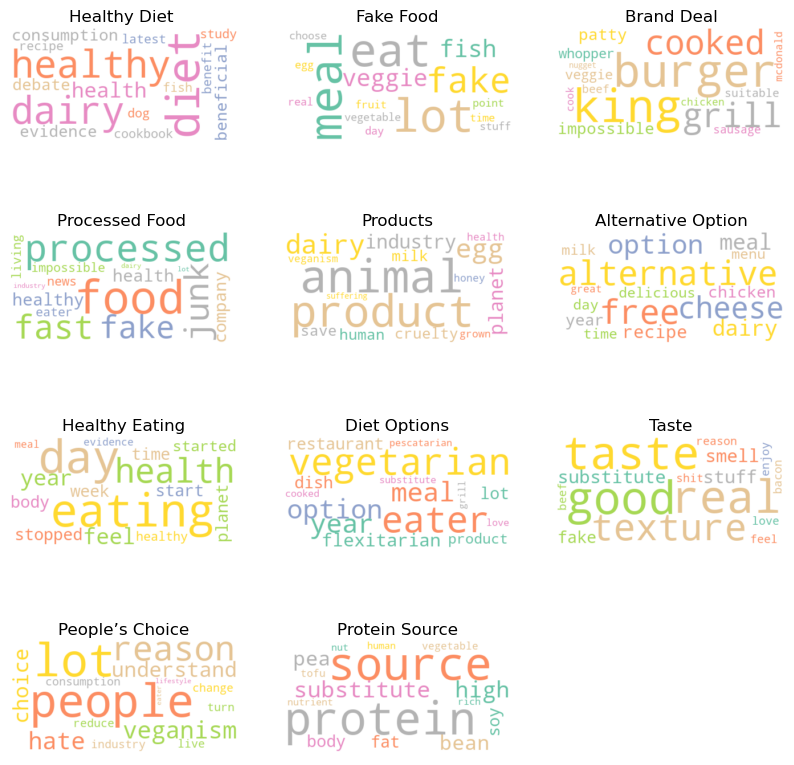

In [47]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="white", min_font_size =8, max_font_size=80, colormap='Set2')
for i in range(len(df_topics_terms)): 
    wordcloud = wc.generate(" ".join(df_topics_terms.topic_term[i]))

    plt.subplot(4, 3, i +1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
    plt.axis("off")
    plt.title(df_topics_terms.topic_title[i])
    plt.savefig("all_topics.png", format="png")
plt.show()

